# Visualisation

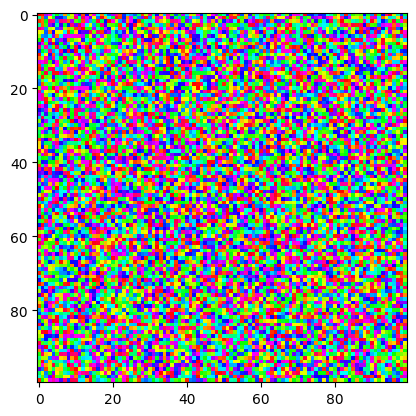

In [11]:
import numpy as np
import matplotlib.pyplot as plt

img = np.random.randint(0, 255, size=(100, 100))
plt.imshow(img, cmap="hsv")
plt.show()

In [13]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {'Perceptually Uniform Sequential': 5, 'Sequential': 6,
          'Sequential (2)': 6, 'Diverging': 6, 'Cyclic': 3,
          'Qualitative': 4, 'Miscellaneous': 6}

# Spacing between the colormaps of a subplot
_DC = {'Perceptually Uniform Sequential': 1.4, 'Sequential': 0.7,
       'Sequential (2)': 1.4, 'Diverging': 1.4, 'Cyclic': 1.4,
       'Qualitative': 1.4, 'Miscellaneous': 1.4}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():

    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(nrows=nsubplots, squeeze=False,
                            figsize=(7, 2.6*nsubplots))

    for i, ax in enumerate(axs.flat):

        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i*dsub:(i+1)*dsub]):

            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == 'Sequential':
                # These colormaps all start at high lightness, but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j*dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ('Perceptually Uniform Sequential',
                                 'Sequential'):
                locs.append(x[-1] + j*dc)
            elif cmap_category in ('Diverging', 'Qualitative', 'Cyclic',
                                   'Miscellaneous', 'Sequential (2)'):
                locs.append(x[int(x.size/2.)] + j*dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position('top')
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i*dsub:(i+1)*dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=50)
        ax.set_ylabel('Lightness $L^*$', fontsize=12)

    ax.set_xlabel(cmap_category + ' colormaps', fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.show()

NameError: name 'cmaps' is not defined